# Calculate the ammount of Xe fits in a volume at a given pressure

> Ricardo Peres, 03.10.2022

Xe data from https://webbook.nist.gov/cgi/cbook.cgi?Name=Xenon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

### Xenon density-pressure curve

At room temperature, xenon goes supercritical ~58 bar and the law of ideal gasses breaks down. To take this into account we use the data availabel from NIST to properly convert local density to pressure and vice-versa.

In [2]:
xe_properties_1 = pd.read_csv('data/Xe_density_at_300.txt',delimiter= '\t')
xe_properties_2 = pd.read_csv('data/Xe_density_at_300_high_pressure.txt',delimiter= '\t')

xe_properties = pd.concat([xe_properties_1,xe_properties_2], ignore_index = True)

xe_dens_from_p = interp1d(xe_properties['Pressure (bar)'], xe_properties['Density (mol/l)']) #mol/l
xe_p_from_dens = interp1d(xe_properties['Density (mol/l)'], xe_properties['Pressure (bar)']) #l/mol

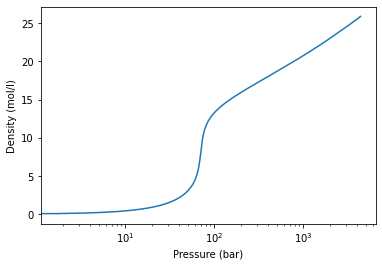

In [3]:
plt.plot(xe_properties['Pressure (bar)'], xe_properties['Density (mol/l)'])
plt.ylabel('Density (mol/l)')
plt.xlabel('Pressure (bar)')
plt.xscale('log')
plt.show()

## Pressure-Mass curves

### Define the pressure-mass functions

In [4]:
R = 83.14466 # L.mbar/mol/K
T = 300 #K
M = 131.293 #g/mol
#m = 70_000 #g
Volume_per_bottle = 40 #L

In [5]:
def get_P_ideal_gas(m, n_bottles):
    n = m*1000/M
    V = n_bottles * Volume_per_bottle
    P = n*R*T/V/1000 #bar
    return P

@np.vectorize
def get_P_Xe(m, n_bottles = 1, V = None):
    n = m*1000/M
    if V is None:
        V = n_bottles * Volume_per_bottle
    dens = n/V
    try:
        P = xe_p_from_dens(dens)
    except:
        P = np.nan
    return P

### Ideal gas case

Ideal gas law:
$$ PV = nRT$$

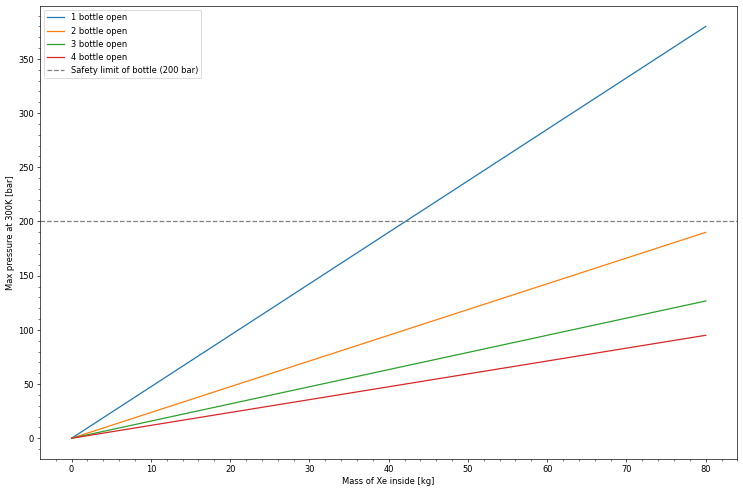

In [6]:
_m = np.linspace(0,80,200)
n_bottle = [1,2,3,4]

plt.figure(figsize=(15,10), dpi = 60)
for _n_bottles in n_bottle:
    plt.plot(_m, get_P_ideal_gas(_m, _n_bottles), label = f'{_n_bottles} bottle open')
plt.ylabel('Max pressure at 300K [bar]')
plt.xlabel('Mass of Xe inside [kg]')
plt.axhline(200, label = 'Safety limit of bottle (200 bar)', ls = '--', c = 'gray')
plt.minorticks_on()
plt.legend()
#plt.savefig('Bottle_pressure.jpg', dpi = 250)
plt.show()

### Proper Xe behaviour

To get the pressure of a certain mass of xenon in a given volume do `get_P_Xe(m = [mass in kg], V = [volume to consider in L])`

In [7]:
get_P_Xe(m = 10, V = 5)

array(160.48213295)

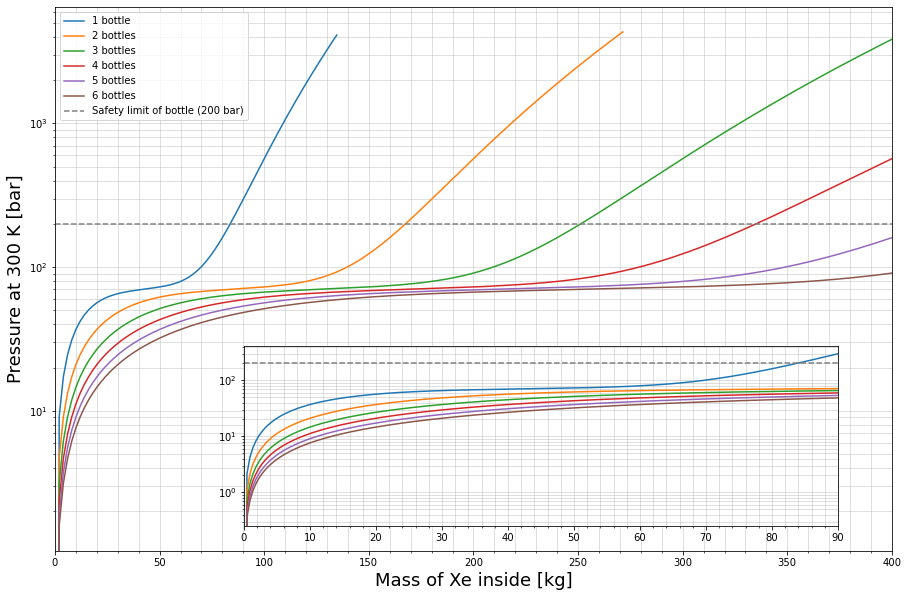

In [8]:
_m = np.linspace(0,400,200)
n_bottle = [1,2,3,4,5,6]

fig, ax = plt.subplots(1,1,figsize=(15,10))#, dpi = 80)
for _n_bottles in n_bottle:
    if _n_bottles == 1:
        ax.plot(_m, get_P_Xe(_m, _n_bottles), label = f'{_n_bottles} bottle')
    else:
        ax.plot(_m, get_P_Xe(_m, _n_bottles), label = f'{_n_bottles} bottles')
ax.axhline(200, label = 'Safety limit of bottle (200 bar)', ls = '--', c = 'gray')

ax.set_xlim(0,400)
ax.set_xlabel('Mass of Xe inside [kg]', fontsize = 18)
ax.set_yscale('log')
ax.set_ylabel('Pressure at 300 K [bar]', fontsize = 18)
ax.grid(which  = 'both', alpha = 0.5)
ax.minorticks_on()
ax.legend()

ax2 = fig.add_axes([0.3, 0.16, 0.55, 0.25])
_m = np.linspace(0,90,200)
for _n_bottles in n_bottle:
    if _n_bottles == 1:
        ax2.plot(_m, get_P_Xe(_m, _n_bottles), label = f'{_n_bottles} bottle')
    else:
        ax2.plot(_m, get_P_Xe(_m, _n_bottles), label = f'{_n_bottles} bottles')
ax2.axhline(200, label = 'Safety limit of bottle (200 bar)', ls = '--', c = 'gray')
ax2.set_xlim(0,90)
#ax2.set_xlabel('Mass of Xe inside [kg]')
ax2.set_yscale('log')
#ax2.set_ylabel('Max pressure at 300K [bar]')
ax2.grid(which  = 'both', alpha = 0.5)
ax2.minorticks_on()
#plt.savefig('Bottle_pressure_Xe_law.jpg', dpi = 600)
plt.show()